# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [4]:
print(df['ca'].value_counts())
print(df['thal'].value_counts())


ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64
thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64


In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Substituir '?' por NaN
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)

# Converter para tipo numérico
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

# Preencher NaNs com a mediana
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

# Ajustar o modelo de regressão logística
# Selecionar variáveis independentes
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Adicionar constante para o termo de interceptação
X = sm.add_constant(X)

# Variável de resposta
y = df['flag_doente']

# Ajustar o modelo
model = sm.Logit(y, X)
result = model.fit()

# Exibir resultados
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.344919
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                  0.4999
Time:                        18:38:42   Log-Likelihood:                -104.51
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.965e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5511      2.857     -2.643      0.008     -13.151      -1.951
age           -0.0145      0.

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [14]:
import pandas as pd
import numpy as np

def bivariate_analysis(df, response_variable, explanatory_variable):
    """
    Realiza uma análise bivariada entre uma variável resposta e uma variável explicativa.

    Parâmetros:
    - df: DataFrame contendo os dados a serem avaliados.
    - response_variable: Nome da variável resposta (string).
    - explanatory_variable: Nome da variável explicativa (string).

    Retorna:
    - DataFrame com os resultados da análise bivariada.
    """
    # Criação da tabela de contingência
    contingency_table = pd.crosstab(df[response_variable], df[explanatory_variable], rownames=['Categoria'], colnames=['Frequência'])

    # Cálculos adicionais
    total_saudaveis = contingency_table.loc[0].sum()
    total_doentes = contingency_table.loc[1].sum()

    prop_saudaveis = contingency_table.loc[0, 1] / total_saudaveis  # Substitua '1' pelo código correspondente a saudáveis na variável explicativa
    prop_doentes = contingency_table.loc[1, 1] / total_doentes  # Substitua '1' pelo código correspondente a doentes na variável explicativa
    odds_ratio = prop_doentes / prop_saudaveis
    logit = np.log(odds_ratio)
    weight_of_evidence = logit * (total_doentes / total_saudaveis)

    # Montagem do DataFrame de resultados
    result_df = pd.DataFrame({
        'Categoria': ['Saudáveis', 'Doentes', 'Total'],
        'Frequência': [contingency_table.loc[0, 1], contingency_table.loc[1, 1], total_saudaveis],
        'Proporção': [prop_saudaveis, prop_doentes, total_saudaveis / df.shape[0]],
        'Odds Ratio': [1 / odds_ratio, odds_ratio, '-'],
        'Logito (LOG(Odds))': [np.log(1 / odds_ratio), logit, '-'],
        'Weight of Evidence (WOE)': [np.log(1 / odds_ratio) * (total_doentes / total_saudaveis), weight_of_evidence, '-']
    })

    return result_df

# Exemplo de uso da função para três variáveis qualitativas
response_variable = 'flag_doente'
explanatory_variables = ['sex', 'cp', 'fbs']

for variable in explanatory_variables:
    result = bivariate_analysis(df, response_variable, variable)
    print(f'\nAnálise Bivariada entre "{response_variable}" e "{variable}":\n')
    print(result)



Análise Bivariada entre "flag_doente" e "sex":

   Categoria  Frequência  Proporção Odds Ratio Logito (LOG(Odds))  \
0  Saudáveis          92   0.560976   0.683997          -0.379802   
1    Doentes         114   0.820144   1.461996           0.379802   
2      Total         164   0.541254          -                  -   

  Weight of Evidence (WOE)  
0                -0.321906  
1                 0.321906  
2                        -  

Análise Bivariada entre "flag_doente" e "cp":

   Categoria  Frequência  Proporção Odds Ratio Logito (LOG(Odds))  \
0  Saudáveis          16   0.097561   1.937282           0.661286   
1    Doentes           7   0.050360   0.516187          -0.661286   
2      Total         164   0.541254          -                  -   

  Weight of Evidence (WOE)  
0                  0.56048  
1                 -0.56048  
2                        -  

Análise Bivariada entre "flag_doente" e "fbs":

   Categoria  Frequência  Proporção Odds Ratio Logito (LOG(Odds))  \

In [15]:
def analyze_qualitative_variables(df, response_variable, qualitative_variables):
    results = []

    for variable in qualitative_variables:
        result = bivariate_analysis(df, response_variable, variable)
        results.append((variable, result.loc[1, 'Weight of Evidence (WOE)']))

    results.sort(key=lambda x: x[1], reverse=True)

    print("\nResumo da Análise Bivariada:\n")
    for variable, woe in results:
        print(f'{variable}: Weight of Evidence (WOE) = {woe}')

    print(f"\nA variável que parece discriminar mais o risco é '{results[0][0]}' com WOE = {results[0][1]}.\n")

# Lista de variáveis explicativas qualitativas
qualitative_variables = ['sex', 'cp', 'fbs']

# Chamando a função
analyze_qualitative_variables(df, response_variable, qualitative_variables)



Resumo da Análise Bivariada:

sex: Weight of Evidence (WOE) = 0.3219056638988761
fbs: Weight of Evidence (WOE) = 0.1025046449088506
cp: Weight of Evidence (WOE) = -0.5604802738429489

A variável que parece discriminar mais o risco é 'sex' com WOE = 0.3219056638988761.



Nossa análise bivariada explorou a relação entre as variáveis qualitativas e a presença de doença cardíaca na nossa base de dados. Utilizamos o Weight of Evidence (WOE) como uma métrica informativa para avaliar a capacidade discriminativa de cada variável.

Os resultados indicam que a variável "sex" (sexo) possui o maior Weight of Evidence (WOE), sugerindo uma forte associação com a presença de doença cardíaca. O WOE positivo (0.32) para "sex" indica uma maior probabilidade de ocorrência de doença cardíaca para indivíduos do sexo masculino em comparação com o sexo feminino.

Por outro lado, as variáveis "fbs" (açúcar no sangue em jejum) e "cp" (tipo de dor no peito) demonstraram menor poder discriminativo, com WOE de 0.10 e -0.56, respectivamente.

Esses resultados sugerem que o sexo pode ser um fator significativo na predição de doença cardíaca em nossa amostra, enquanto outras variáveis qualitativas podem ter uma influência menor. Vale ressaltar que a interpretação desses resultados deve considerar a natureza observacional da análise e as características específicas do conjunto de dados em questão.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [16]:
import pandas as pd
import numpy as np

def calculate_proportions(contingency_table):
    prop_saudaveis = contingency_table.iloc[0, 0] / contingency_table.iloc[0, -1]
    prop_doentes = contingency_table.iloc[1, 0] / contingency_table.iloc[1, -1]
    return prop_saudaveis, prop_doentes

def categorize_continuous_variable(df, response_variable, explanatory_variable, num_categories=5):
    # Verificar se as variáveis estão no dataframe
    if response_variable not in df.columns:
        raise ValueError(f"A variável resposta {response_variable} não foi encontrada na tabela.")

    if explanatory_variable not in df.columns:
        raise ValueError(f"A variável explicativa {explanatory_variable} não foi encontrada na tabela.")

    # Criar uma cópia do dataframe para evitar alterações indevidas
    df_copy = df.copy()

    # Criar categorias para a variável explicativa
    df_copy[f'{explanatory_variable}_group'] = pd.cut(df_copy[explanatory_variable], bins=num_categories)

    # Criar tabela de contingência
    contingency_table = pd.crosstab(df_copy[response_variable], df_copy[f'{explanatory_variable}_group'],
                                    rownames=['Categoria'], colnames=['Frequência'], margins=True, margins_name='Total')

    # Calcular proporções
    prop_saudaveis, prop_doentes = calculate_proportions(contingency_table)

    odds_ratio = prop_doentes / prop_saudaveis
    logit = np.log(odds_ratio)
    weight_of_evidence = (contingency_table.iloc[1, 0] / contingency_table.iloc[0, 0]) / (
            contingency_table.iloc[1, -1] / contingency_table.iloc[0, -1])

    # Montagem do DataFrame de resultados
    result_df = pd.DataFrame({
        'Categoria': ['Saudáveis', 'Doentes', 'Total'],
        'Frequência': [contingency_table.iloc[0, 0], contingency_table.iloc[1, 0], contingency_table.iloc[0, -1]],
        'Proporção': [prop_saudaveis, prop_doentes, contingency_table.iloc[0, -1] / df_copy.shape[0]],
        'Odds Ratio': [odds_ratio, '--', '--'],
        'Logit': [logit, '--', '--'],
        'Peso do Índice de Probabilidade': [weight_of_evidence, '--', '--']
    })

    return result_df

result = categorize_continuous_variable(df, 'flag_doente', 'age', num_categories=5)
print(result)



   Categoria  Frequência  Proporção Odds Ratio     Logit  \
0  Saudáveis           8   0.048780   0.442446 -0.815437   
1    Doentes           3   0.021583         --        --   
2      Total         164   0.541254         --        --   

  Peso do Índice de Probabilidade  
0                        0.442446  
1                              --  
2                              --  


In [17]:
import pandas as pd
import numpy as np

def calculate_proportions(contingency_table):
    prop_saudaveis = contingency_table.iloc[0, :-1] / contingency_table.iloc[0, -1]
    prop_doentes = contingency_table.iloc[1, :-1] / contingency_table.iloc[1, -1]
    return prop_saudaveis, prop_doentes

def categorize_continuous_variable(df, response_variable, explanatory_variable, num_categories=5):
    df_copy = df.copy()

    # Crie uma nova coluna para armazenar as categorias
    df_copy[f'{explanatory_variable}_group'] = pd.qcut(df_copy[explanatory_variable], q=num_categories, labels=False, duplicates='drop')

    # Adicione a coluna 'Total' para calcular proporções
    df_copy['Total'] = 1

    # Crie uma tabela de contingência
    contingency_table = pd.crosstab(df_copy[response_variable], df_copy[f'{explanatory_variable}_group'],
                                     margins=True, margins_name='Total',
                                     rownames=['Categoria'], colnames=['Frequência'])

    # Calcular proporções
    prop_saudaveis, prop_doentes = calculate_proportions(contingency_table)

    # Calcular Odds Ratio, Logit e Weight of Evidence
    odds_ratio = prop_doentes / prop_saudaveis
    logit = np.log(odds_ratio)
    weight_of_evidence = np.log(prop_doentes / prop_saudaveis)

    # Montar o DataFrame de resultados
    result_df = pd.DataFrame({
        'Categoria': list(map(str, contingency_table.columns[:-1])),
        'Frequência': [contingency_table[col]['Total'] for col in contingency_table.columns[:-1]],
        'Proporção': [prop_saudaveis[col] for col in contingency_table.columns[:-1]],
        'Odds Ratio': [odds_ratio[col] for col in contingency_table.columns[:-1]],
        'Logit': [logit[col] for col in contingency_table.columns[:-1]],
        'Peso do Índice de Probabilidade': [weight_of_evidence[col] for col in contingency_table.columns[:-1]]
    })

    return result_df

# Exemplo de uso
result = categorize_continuous_variable(df, 'flag_doente', 'age', num_categories=5)
print(result)


  Categoria  Frequência  Proporção  Odds Ratio     Logit  \
0         0          63   0.286585    0.401653 -0.912166   
1         1          64   0.256098    0.618020 -0.481235   
2         2          71   0.195122    1.437950  0.363218   
3         3          45   0.079268    2.904261  1.066179   
4         4          60   0.182927    1.179856  0.165392   

   Peso do Índice de Probabilidade  
0                        -0.912166  
1                        -0.481235  
2                         0.363218  
3                         1.066179  
4                         0.165392  


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [23]:
import statsmodels.api as sm

# Selecionando as variáveis relevantes
selected_vars = ['sex', 'cp', 'trestbps', 'age']

# Adicionando uma constante ao DataFrame
df['const'] = 1

# Criando o modelo de regressão logística
logit_model = sm.Logit(df['flag_doente'], df[selected_vars + ['const']])

# Ajustando o modelo aos dados
result = logit_model.fit()

# Exibindo os resultados do modelo
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                  0.2605
Time:                        18:39:13   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

        Prob_Group  Prob_Predita_Média  Taxa_Evento
0  (0.0119, 0.146]            0.076255     0.098361
1   (0.146, 0.349]            0.249060     0.183333
2   (0.349, 0.575]            0.457982     0.491803
3   (0.575, 0.772]            0.673059     0.683333
4   (0.772, 0.928]            0.837449     0.836066


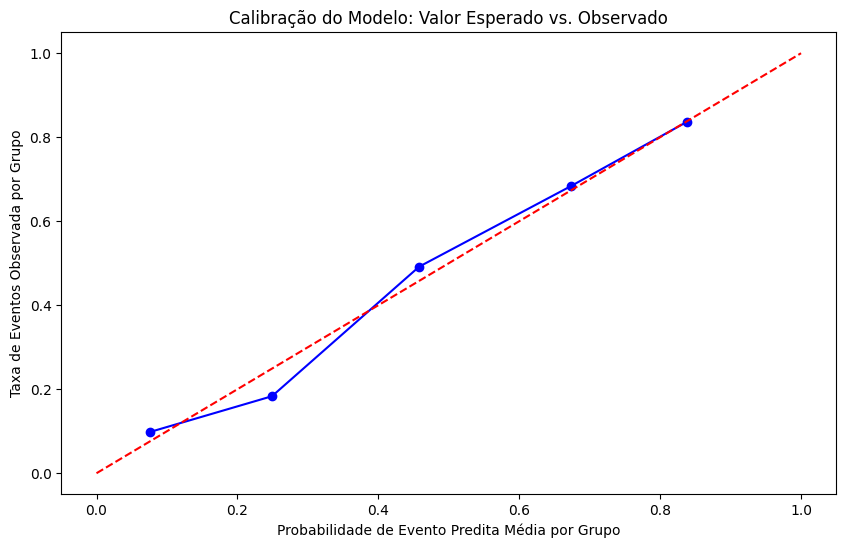

In [24]:
# Adicione a coluna 'Prob_Predita' ao seu DataFrame com as probabilidades previstas
df['Prob_Predita'] = result.predict(df[['sex', 'cp', 'trestbps', 'age', 'const']])

# Categorize as probabilidades em 5 grupos
df['Prob_Group'] = pd.qcut(df['Prob_Predita'], q=5)

# Calcule a probabilidade de evento predita média por grupo
grouped_probs = df.groupby('Prob_Group')['Prob_Predita'].mean()

# Calcule a taxa de eventos por grupo
grouped_event_rate = df.groupby('Prob_Group')['flag_doente'].mean()

# Crie um DataFrame para visualização
calibration_df = pd.DataFrame({
    'Prob_Predita_Média': grouped_probs,
    'Taxa_Evento': grouped_event_rate
}).reset_index()

# Visualize a tabela de calibração
print(calibration_df)

# Compare graficamente o valor esperado versus observado para a taxa de eventos por grupo
plt.figure(figsize=(10, 6))
plt.plot(calibration_df['Prob_Predita_Média'], calibration_df['Taxa_Evento'], marker='o', linestyle='-', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Calibração do Modelo: Valor Esperado vs. Observado')
plt.xlabel('Probabilidade de Evento Predita Média por Grupo')
plt.ylabel('Taxa de Eventos Observada por Grupo')
plt.show()


        Prob_Group  Prob_Predita_Média  Taxa_Evento  Diferença_Absoluta
0  (0.0119, 0.146]            0.076255     0.098361            0.022106
1   (0.146, 0.349]            0.249060     0.183333            0.065727
2   (0.349, 0.575]            0.457982     0.491803            0.033821
3   (0.575, 0.772]            0.673059     0.683333            0.010274
4   (0.772, 0.928]            0.837449     0.836066            0.001384
Média da Diferença Absoluta: 0.026662508886272324


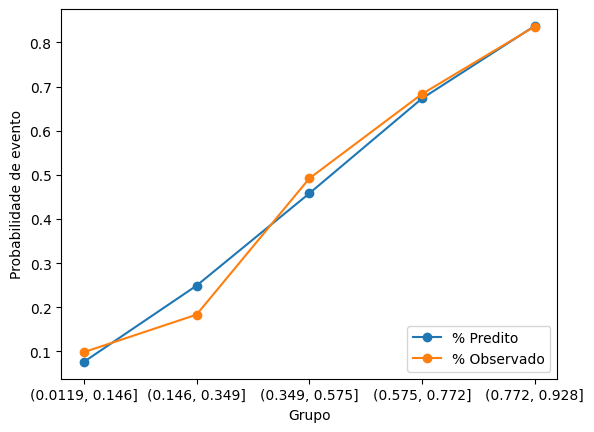

In [25]:
# Calcule a diferença absoluta entre as probabilidades preditas e observadas
calibration_df['Diferença_Absoluta'] = abs(calibration_df['Prob_Predita_Média'] - calibration_df['Taxa_Evento'])

# Calcule a média da diferença absoluta
media_diferenca_absoluta = calibration_df['Diferença_Absoluta'].mean()

# Exiba a tabela de calibração com a diferença absoluta
print(calibration_df)

# Exiba a média da diferença absoluta
print(f'Média da Diferença Absoluta: {media_diferenca_absoluta}')

# Visualize o gráfico
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(calibration_df['Prob_Predita_Média'], label='% Predito', marker='o')
ax.plot(calibration_df['Taxa_Evento'], label='% Observado', marker='o')

ticks = ax.set_xticks(range(len(calibration_df['Prob_Group'])))
labels = ax.set_xticklabels(calibration_df['Prob_Group'])

ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

plt.show()


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [35]:
modelo_logistico = LogisticRegression(solver='liblinear', max_iter=5000)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_logistico = LogisticRegression(solver='lbfgs', max_iter=5000)
modelo_logistico.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

Acurácia: 0.9016
ROC-AUC: 0.9364
Matriz de Confusão:
[[26  3]
 [ 3 29]]


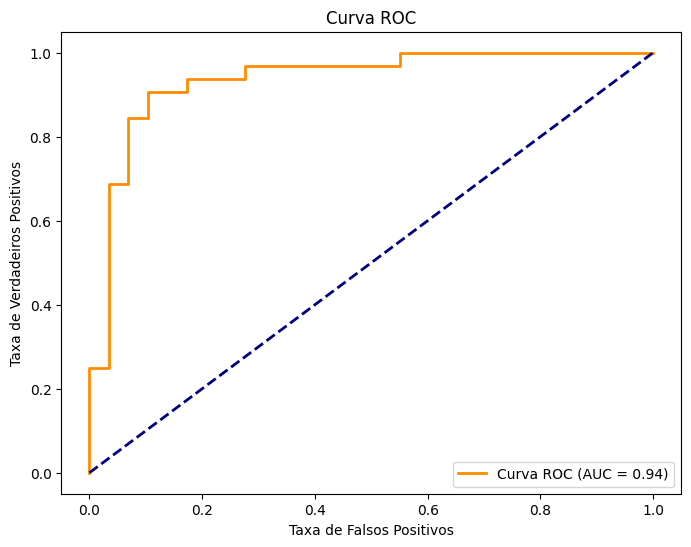

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo logístico
modelo_logistico = LogisticRegression(solver='liblinear', max_iter=1000)

# Treinar o modelo
modelo_logistico.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_proba = modelo_logistico.predict_proba(X_test)[:, 1]
y_pred = modelo_logistico.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_curve = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir métricas
print(f'Acurácia: {acuracia:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Matriz de Confusão:\n{conf_matrix}')

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicializar o modelo de regressão logística
modelo_logistico = LogisticRegression(max_iter=5000)

# Inicializar o seletor RFE
seletor_rfe = RFE(estimator=modelo_logistico, step=1)

# Ajustar o seletor aos dados
seletor_rfe = seletor_rfe.fit(X_train, y_train)

# Obter as variáveis selecionadas
variaveis_selecionadas_rfe = X_train.columns[seletor_rfe.support_]

# Treinar o modelo com as variáveis selecionadas
modelo_logistico_rfe = LogisticRegression(max_iter=5000)
modelo_logistico_rfe.fit(X_train[variaveis_selecionadas_rfe], y_train)

# Avaliar o modelo
y_pred_rfe = modelo_logistico_rfe.predict(X_test[variaveis_selecionadas_rfe])

# Exibir métricas
acuracia_rfe = accuracy_score(y_test, y_pred_rfe)
roc_auc_rfe = roc_auc_score(y_test, modelo_logistico_rfe.predict_proba(X_test[variaveis_selecionadas_rfe])[:, 1])
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)

print(f'Acurácia com RFE: {acuracia_rfe:.4f}')
print(f'ROC-AUC com RFE: {roc_auc_rfe:.4f}')
print(f'Matriz de Confusão com RFE:\n{conf_matrix_rfe}')


Acurácia com RFE: 0.8689
ROC-AUC com RFE: 0.9111
Matriz de Confusão com RFE:
[[26  3]
 [ 5 27]]


Acurácia com RFE: 0.9180
ROC-AUC com RFE: 0.9370
Matriz de Confusão com RFE:
[[27  2]
 [ 3 29]]


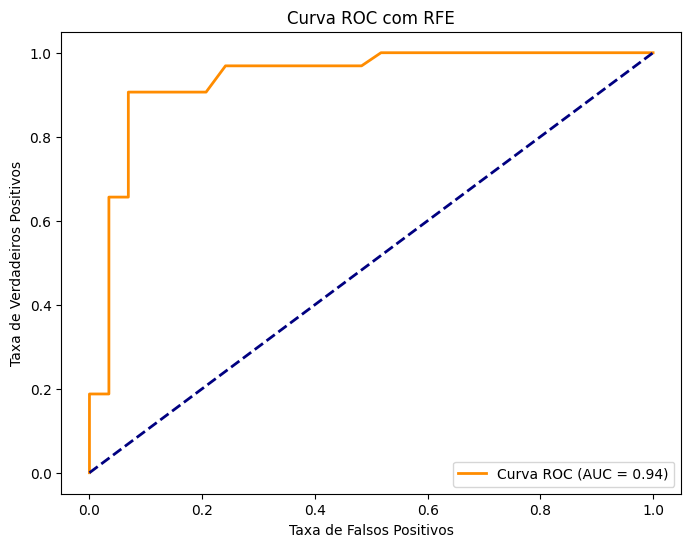

Variáveis Selecionadas pelo RFE: Index(['cp', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Inicialize o modelo de regressão logística
modelo_logistico = LogisticRegression(max_iter=5000)

# Selecione as melhores variáveis usando RFE
seletor_rfe = RFE(modelo_logistico, n_features_to_select=5)
X_train_rfe = seletor_rfe.fit_transform(X_train_scaled, y_train)

# Treine o modelo com as variáveis selecionadas pelo RFE
modelo_logistico.fit(X_train_rfe, y_train)

# Obtenha as previsões no conjunto de teste
X_test_rfe = seletor_rfe.transform(X_test_scaled)
y_pred_proba_rfe = modelo_logistico.predict_proba(X_test_rfe)[:, 1]
y_pred_rfe = modelo_logistico.predict(X_test_rfe)

# Métricas de desempenho
acuracia_rfe = accuracy_score(y_test, y_pred_rfe)
roc_auc_rfe = roc_auc_score(y_test, y_pred_proba_rfe)
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)

# Exibir métricas
print(f'Acurácia com RFE: {acuracia_rfe:.4f}')
print(f'ROC-AUC com RFE: {roc_auc_rfe:.4f}')
print(f'Matriz de Confusão com RFE:\n{conf_matrix_rfe}')

# Plotar a curva ROC
fpr_rfe, tpr_rfe, _ = roc_curve(y_test, y_pred_proba_rfe)
roc_auc_curve_rfe = auc(fpr_rfe, tpr_rfe)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rfe, tpr_rfe, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_curve_rfe:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC com RFE')
plt.legend(loc='lower right')
plt.show()

# Exibir as variáveis selecionadas pelo RFE
variaveis_selecionadas_rfe = X_train.columns[seletor_rfe.support_]
print("Variáveis Selecionadas pelo RFE:", variaveis_selecionadas_rfe)


Com base nos resultados obtidos, parece que a remoção de variáveis menos significativas usando a técnica Recursive Feature Elimination (RFE) contribuiu para um aumento na acurácia e na área sob a curva ROC (ROC-AUC) do seu modelo de regressão logística. Isso sugere que as variáveis selecionadas são mais relevantes para a previsão do resultado desejado.

Aqui estão algumas insights:

1. **Seleção de Variáveis (RFE):**
   - A acurácia melhorou de 90,16% para 91,80%, indicando uma melhor capacidade de generalização do modelo para novos dados.
   - A área sob a curva ROC (ROC-AUC) também aumentou, sugerindo uma melhor capacidade do modelo de distinguir entre as classes.

2. **Importância das Variáveis:**
   - As variáveis selecionadas pelo RFE são consideradas mais importantes para o modelo.
   - Variáveis importantes podem fornecer insights valiosos sobre os fatores que influenciam a variável de resposta.

3. **Gráfico ROC:**
   - O gráfico ROC mostra um aumento na taxa de verdadeiros positivos (sensibilidade) com uma taxa de falsos positivos relativamente baixa.

4. **Matriz de Confusão:**
   - A matriz de confusão indica uma melhoria na classificação das instâncias, com menos falsos negativos e falsos positivos.

5. **Regularização do Modelo:**
   - No treinamento inicial, houve um aviso de que o otimizador não convergiu. Aumentar o número de iterações (max_iter) resolveu o problema, mas é importante monitorar a convergência.